In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

from tqdm.notebook import tqdm

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.dpi'] = 80
# matplotlib.rcParams['figure.figsize'] = [17, 4]
matplotlib.rcParams['axes.grid'] = True

In [2]:
import sys
sys.path.insert(0, '../')

from lib_data import *
from lib_nn_dpe import NN_dpe

In [3]:
from dpe import DPE

dpe = DPE('COM3')
dpe.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


In [5]:
g = dpe.read(0, method='slow')

....

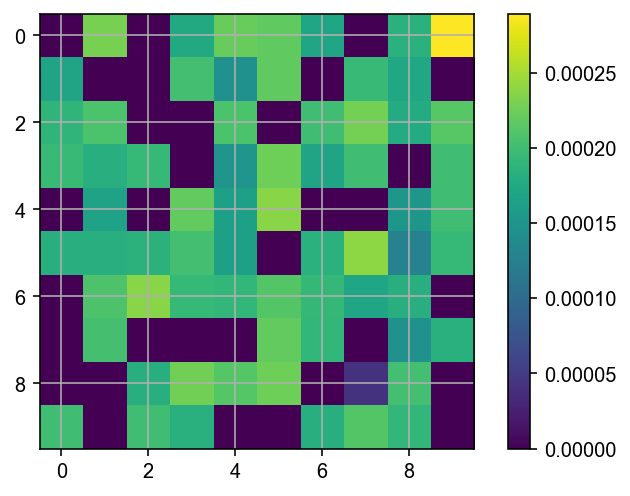

In [23]:
plt.imshow(g[:10,:10])
plt.colorbar()

In [19]:
Msel = np.zeros((64,64))
Msel[:10,:10] = 1

g2 = dpe.read(0, method='single', Msel=Msel)

[WARINING] read 100 devices with single mode, expect very long reading time


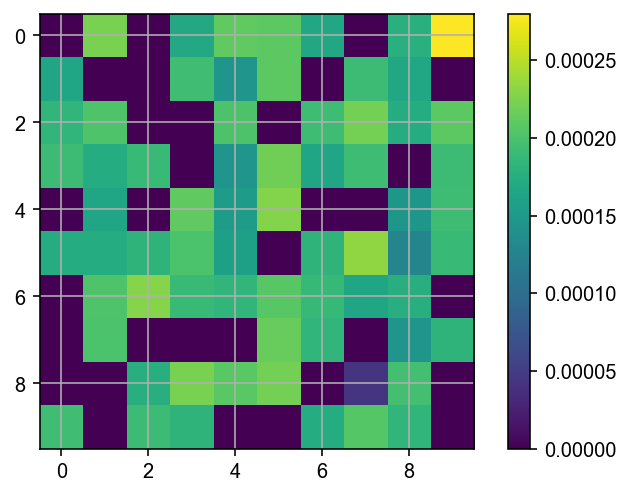

In [22]:
plt.imshow(g2[:10,:10])
plt.colorbar()

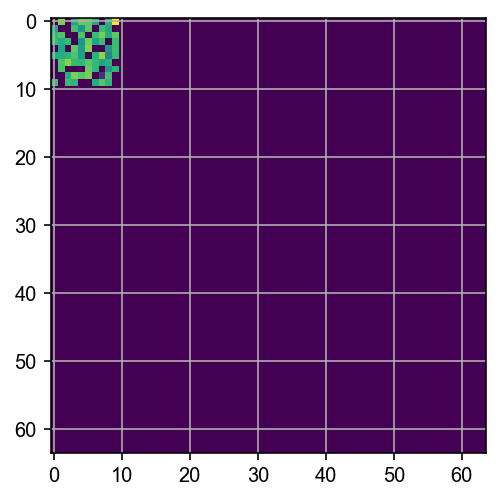

In [24]:
plt.imshow(g2)

....

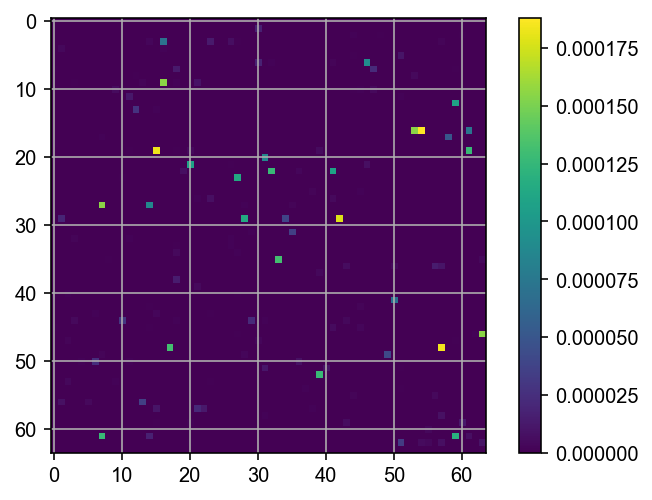

In [27]:
g1 = dpe.read(1)
plt.imshow(g1)
plt.colorbar()

## Programmming

In [44]:
# Gtol = 4e-6
Gtarget = np.zeros((64,64))
Gtarget[1,0] = 30e-6

Msel = np.zeros((64,64))
Msel[1,0] = 1

Noted the method parameter is set to 'single' here

In [45]:
data = dpe.tune_conductance(0, Gtarget, saveHistory=True, maxSteps=500, maxRetry=2, method='single', vSetRamp = [0.4, 2.6, 0.1], 
                         vGateSetRamp = [0.3, 1.4, 0.05], vResetRamp = [0.3, 1.5, 0.1], vGateResetRamp = [5.0, 5.5, 0.5], TwidthSet=40e-9, TwidthReset=1e-3, 
                         Gtol_in=4e-6, Gtol_out=10e-6, Msel=Msel, numReads=1)

Start programming, step=15, maxBound=0 yield= 0.00% - 0.00%
1.0 devices to be programmed...reset 0.0, set 1.0
Setting 1 devices...
Programming with internal timing P_RESET=3
Resetting 0 devices...
Programming with external timing Twidth=1000.000 us
------------------------------
Programming completed.


In [46]:
from lib_tune_g import *

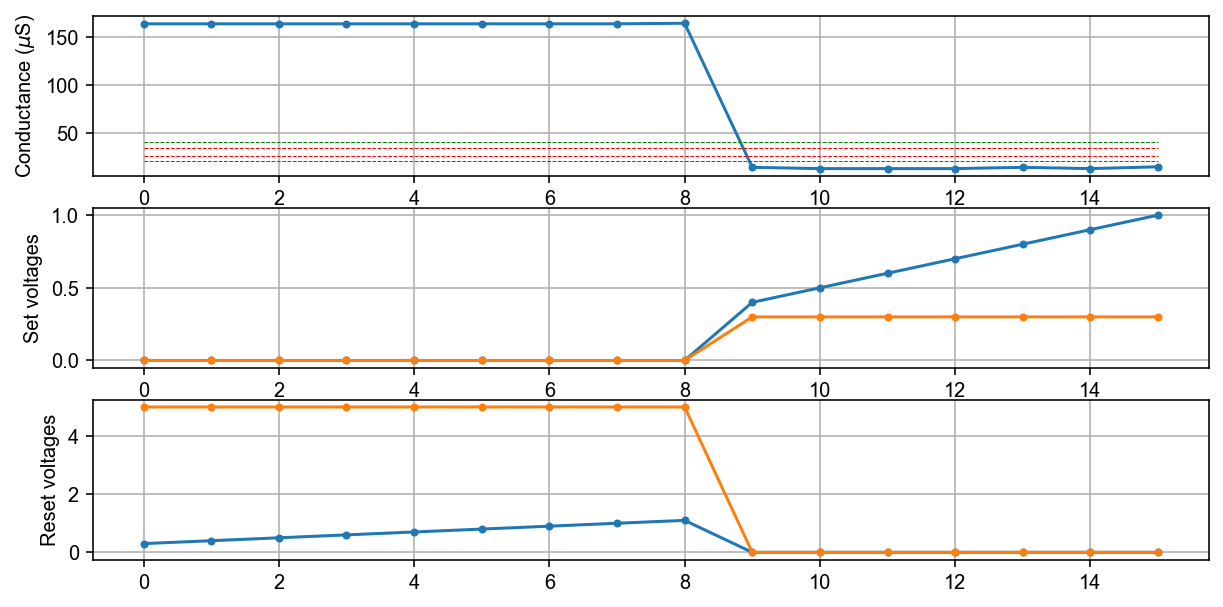

In [47]:
plot_history(1, 0, data)

## Only one conductance is read

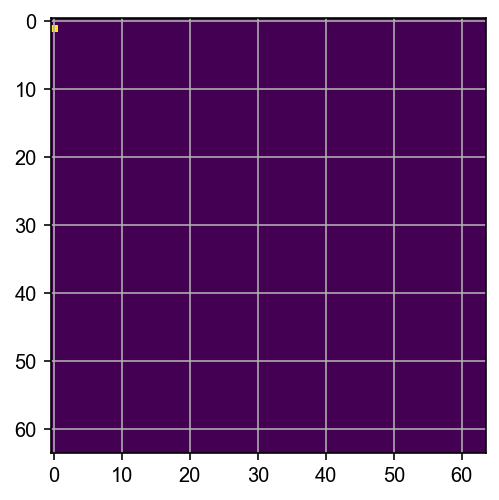

In [48]:
plt.imshow(data['hist_data']['Ghist'][-1])